In [1]:
%matplotlib inline

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
pyber_ride_df=pd.read_csv("Resources/PyBer_ride_data.csv")
city_data_df=pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
pyber_data_df =pd.merge(ride_data_df, city_data_df)#, on=['city','city'])

In [59]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [60]:
std=np.std(pyber_ride_df["Avg. Fare ($USD)"])

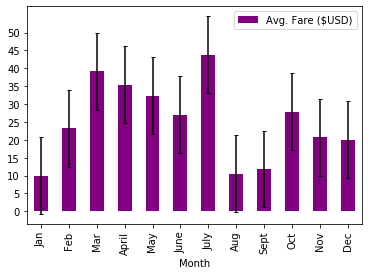

In [61]:
# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]
# Plot the data.
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)", color='purple', yerr=std, capsize = 2)
plt.xticks(x_axis, pyber_ride_df["Month"])
plt.yticks(np.arange(0,51,5))
plt.show()

In [62]:
#Separate data by city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [79]:
urban_ride_count=urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count=suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count=rural_cities_df.groupby('city').count()['ride_id']

In [63]:
urban_avg_fare=urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare=rural_cities_df.groupby('city').mean()['fare']

In [64]:
urban_driver_count=urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count=suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count=rural_cities_df.groupby('city').mean()['driver_count']

In [65]:
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

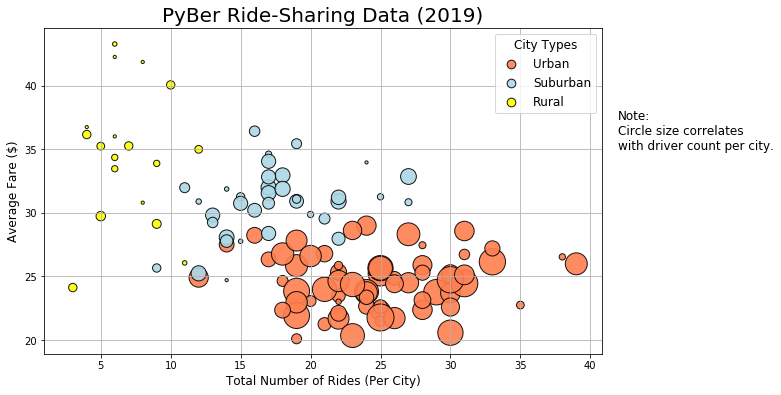

In [98]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="k", alpha=0.9, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="lightblue", edgecolor="k", alpha=0.9, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="yellow", edgecolor="k", alpha=0.9, label="Rural")

# Show the plot
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.show()

In [100]:
# Save the figure.
plt.savefig("Fig1.png")

<Figure size 432x288 with 0 Axes>